In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # Add this import statement


In [14]:
# Read the updated CSV file
data = pd.read_csv("filtered_data.csv")  # Replace with your actual CSV file name
df = pd.DataFrame(data)


In [15]:

# Map categorical "Order_Priority" values to numeric values
order_priority_mapping = {
    "High": 3,
    "Medium": 2,
    "Low": 1,
    "Not Specified": 0,
    "Critical": 0  # You mentioned mapping "Critical" to 0
}

# Map the "Order_Priority" column using the mapping
df["Order_Priority"] = df["Order_Priority"].map(order_priority_mapping)

In [16]:
# Define the features (independent variables)
X = df[['Sales', 'Order_Quantity', 'Profit', 'Order_Priority']]

# Define the target variable (dependent variable)
y = df['result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Random Forest classifier
n_estimators = 100  # You can adjust the number of trees (n_estimators) as needed
model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

Confusion Matrix:
[[23  2]
 [ 1  4]]


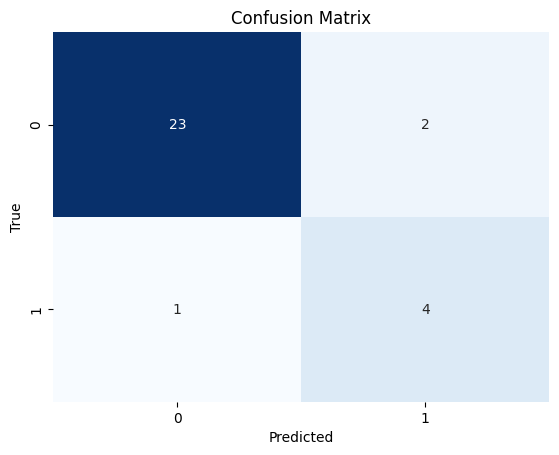

In [18]:
#  you have already defined y_test and y_pred
# Add a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:

# Calculate accuracy for evaluation
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [19]:

# Create a new row of data for prediction
new_data = {
    'Sales': [1500],
    'Order_Quantity': [100],
    'Profit': [500],
    'Order_Priority': [2]  # Replace with the desired order priority value (e.g., 2 for "Medium")
}
new_df = pd.DataFrame(new_data)

# Make a prediction for the new data
predicted_product = model.predict(new_df)

if predicted_product[0] == 1:
    print('Predicted Product: Yes')
else:
    print('Predicted Product: No')

Predicted Product: Yes


In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the trained Random Forest model
n_estimators = 100  # You can adjust the number of trees (n_estimators) as needed
model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
model.fit(X_train, y_train)  # Assuming you have already trained the model

# Read the test dataset
test_data = pd.read_csv("test.csv")  # Replace with the path to your "test.csv" file
test_df = pd.DataFrame(test_data)

# Map categorical "Order_Priority" values to numeric values
test_df["Order_Priority"] = test_df["Order_Priority"].map(order_priority_mapping)

# Define the features (independent variables) for the test dataset
X_test = test_df[['Sales', 'Order_Quantity', 'Profit', 'Order_Priority']]

# Make predictions on the test dataset
test_predictions = model.predict(X_test)

# Map binary predicti
#ans to "Yes" or "No"
test_predictions = ["Yes" if pred == 1 else "No" for pred in test_predictions]

# Add the "Result" column to the test dataset
test_df["Result"] = test_predictions

# Save the updated test dataset with the "Result" column
test_df.to_csv("test_with_results_randomforest.csv", index=False)  # Replace with the desired output file name
